In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
!pip install mplfinance
import mplfinance as mpf

In [97]:
# Carregar o arquivo CSV
df = pd.read_csv('D:/Downloads/IXIC.csv')

# Primeiras linhas do dataframe para verificar o conteúdo
print(df.head())

# Verificar os nomes das colunas
print(df.columns)

# Converter a coluna 'Date' para o formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Definir a coluna 'Date' como índice
df.set_index('Date', inplace=True)

# Primeiras linhas do dataframe para verificar a preparação dos dados
print(df.head())

# Filtrar os dados para o mês de Abril de 2024
df_april_2024 = df.loc['2024-04-01':'2024-04-30'].copy()

# Calcular as médias móveis de 3, 6 e 9 dias sobre o preço de fechamento
df_april_2024.loc[:, 'MA3'] = df_april_2024['Close'].rolling(window=3).mean()
df_april_2024.loc[:, 'MA6'] = df_april_2024['Close'].rolling(window=6).mean()
df_april_2024.loc[:, 'MA9'] = df_april_2024['Close'].rolling(window=9).mean()

# Primeiras linhas do dataframe para verificar as médias móveis calculadas
print(df_april_2024.head(10))

         Date          Open          High           Low         Close  \
0  2023-07-05  13772.099609  13844.500000  13764.250000  13791.650391   
1  2023-07-06  13653.169922  13689.519531  13567.250000  13679.040039   
2  2023-07-07  13668.070313  13804.509766  13656.730469  13660.719727   
3  2023-07-10  13645.370117  13692.410156  13584.870117  13685.480469   
4  2023-07-11  13709.809570  13774.830078  13643.320313  13760.700195   

      Adj Close      Volume  
0  13791.650391  5339340000  
1  13679.040039  6113080000  
2  13660.719727  5098120000  
3  13685.480469  5275390000  
4  13760.700195  4840950000  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                    Open          High           Low         Close  \
Date                                                                 
2023-07-05  13772.099609  13844.500000  13764.250000  13791.650391   
2023-07-06  13653.169922  13689.519531  13567.250000  13679.040039   
2023-07-07  13

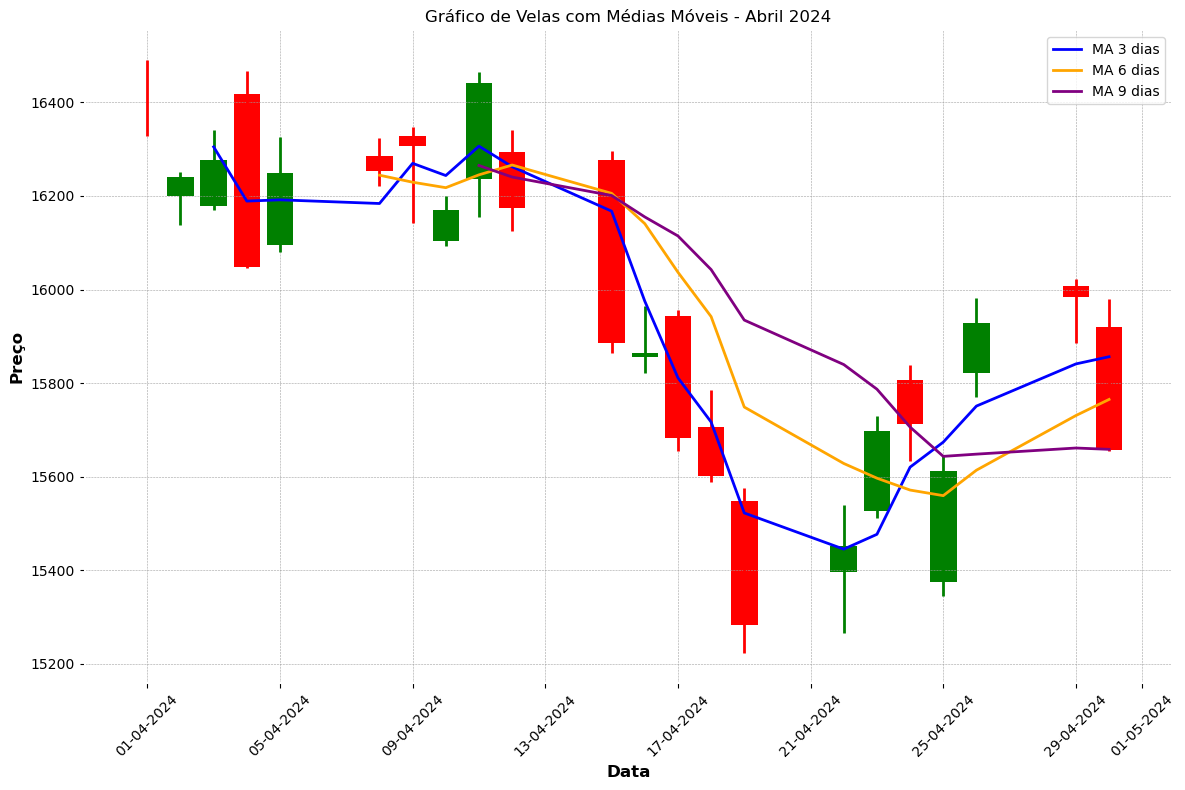

In [99]:
# Configurar o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Desenhar as velas
for idx, row in df_april_2024.iterrows():
    color = 'green' if row['Close'] >= row['Open'] else 'red'
    # Limites da vela
    bar_high = max(row['Open'], row['Close'])
    bar_low = min(row['Open'], row['Close'])
    ax.vlines(x=idx, ymin=row['Low'], ymax=row['High'], color=color)
    ax.bar(idx, bar_high - bar_low, bottom=bar_low, color=color)

# Plotar as médias móveis
ax.plot(df_april_2024.index, df_april_2024['MA3'], label='MA 3 dias', color='blue')
ax.plot(df_april_2024.index, df_april_2024['MA6'], label='MA 6 dias', color='orange')
ax.plot(df_april_2024.index, df_april_2024['MA9'], label='MA 9 dias', color='purple')

# Formato do eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=45)

# Legendas e título
plt.legend()
plt.title('Gráfico de Velas com Médias Móveis - Abril 2024')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.tight_layout()
plt.show()

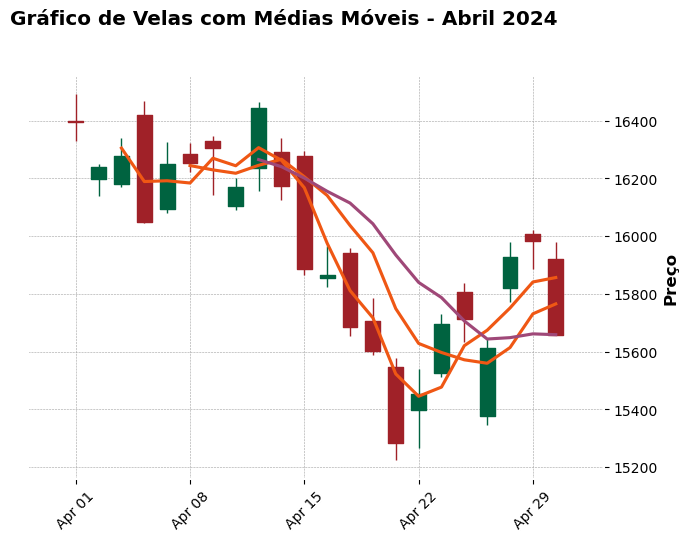

In [101]:
# Plotar o gráfico de velas com médias móveis usando mplfinance
mpf.plot(df_april_2024, type='candle', mav=(3, 6, 9), style='charles', title='Gráfico de Velas com Médias Móveis - Abril 2024', ylabel='Preço')

In [117]:
'''
Comparando os gráficos gerados pelo matplotlib e pelo mplfinance, nota-se uma diferença significativa na maneira como os dados são plotados:

Com o matplotlib, todos os dias do mês são plotados, incluindo sábados e domingos, mesmo que não haja dados disponíveis para esses dias. Isso resulta em espaços entre as velas nos dias em que não há negociações, como nos fins de semana.

Por outro lado, o mplfinance exclui os dias de fim de semana nos quais não há dados disponíveis, o que faz com que as velas sejam plotadas mais próximas umas das outras. Isso ajuda a manter a continuidade visual no gráfico, sem espaços vazios entre os dias sem dados de mercado.

Essa diferença é perceptível ao visualizar os gráficos gerados pelos dois métodos, influenciando a aparência e a interpretação dos dados financeiros representados.
'''

'\nComparando os gráficos gerados pelo matplotlib e pelo mplfinance, nota-se uma diferença significativa na maneira como os dados são plotados:\n\nCom o matplotlib, todos os dias do mês são plotados, incluindo sábados e domingos, mesmo que não haja dados disponíveis para esses dias. Isso resulta em espaços entre as velas nos dias em que não há negociações, como nos fins de semana.\n\nPor outro lado, o mplfinance exclui os dias de fim de semana nos quais não há dados disponíveis, o que faz com que as velas sejam plotadas mais próximas umas das outras. Isso ajuda a manter a continuidade visual no gráfico, sem espaços vazios entre os dias sem dados de mercado.\n\nEssa diferença é perceptível ao visualizar os gráficos gerados pelos dois métodos, influenciando a aparência e a interpretação dos dados financeiros representados.\n'